# 01. Importing Libaries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
#This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#defining path

path = r'C:\Users\Jonathan\Desktop\Amsterdam AirBnB'

In [4]:
#importing dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_details_clean_2.csv'), index_col = False)

In [5]:
df.head()

,price,number_of_reviews,review_scores_rating,bathrooms,bedrooms,availability_365,host_total_listings_count,Review count category
0,59.0,248,97.0,1.5,1.0,44,1.0,High review count
1,160.0,42,96.0,1.0,2.0,47,1.0,High review count
2,80.0,233,87.0,1.0,1.0,198,2.0,High review count
3,125.0,1,100.0,1.0,1.0,141,2.0,Low review count
4,150.0,171,99.0,1.0,1.0,199,1.0,High review count


In [6]:
df.rename(columns = {'price' : 'Rental Rate', 'number_of_reviews' : '# of Reviews', 'review_scores_rating' : 'Review Scores', 'bathrooms' : '# of Bathrooms', 'bedrooms' : '# of Bedrooms', 'availability_365' : 'Availability', 'host_total_listings_count' : 'Host Total Listings'}, inplace = True)

In [7]:
df.isnull().sum()

Rental Rate                 0
# of Reviews                0
Review Scores            2639
# of Bathrooms             10
# of Bedrooms               8
Availability                0
Host Total Listings         4
Review count category       0
dtype: int64

In [8]:
#Remove non-numeric columns.

df = df.drop(columns=['Review count category'])

In [9]:
df_2 = df.dropna()

In [10]:
df_2.isnull().sum()

Rental Rate            0
# of Reviews           0
Review Scores          0
# of Bathrooms         0
# of Bedrooms          0
Availability           0
Host Total Listings    0
dtype: int64

# 02. Elbow Technique

In [11]:
#Define the range of potential clusters in the data.

num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [12]:
#Creates a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

score

C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jonathan\anaconda3\Lib\site-package

[-547211572.2172624,
 -385112362.79778624,
 -226134146.61863714,
 -168545782.17261323,
 -140094337.37879437,
 -122592894.1568471,
 -107483517.20597586,
 -92839754.65044539,
 -80772243.32847959]

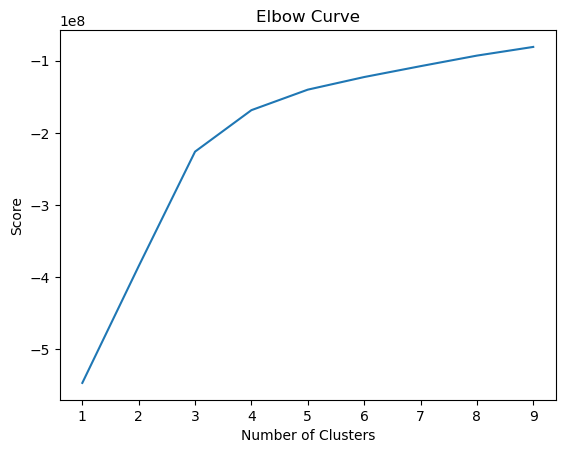

In [13]:
#Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Looking at the Elbow curve there seems to be a large jump until we get to 4 to 5 clusters. There may be an argument that the curve continues to rise it appears to rise very minimally. Thus I will be continuing the analysis using 4 clusters.

# 03. K-means Clustering

In [14]:
#Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [15]:
#Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [16]:
#add new column to dataframe

df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\Jonathan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jonathan\AppData\Local\Temp\ipykernel_5520\1407842032.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [17]:
df_2.head()

,Rental Rate,# of Reviews,Review Scores,# of Bathrooms,# of Bedrooms,Availability,Host Total Listings,clusters
0,59.0,248,97.0,1.5,1.0,44,1.0,0
1,160.0,42,96.0,1.0,2.0,47,1.0,0
2,80.0,233,87.0,1.0,1.0,198,2.0,2
3,125.0,1,100.0,1.0,1.0,141,2.0,0
4,150.0,171,99.0,1.0,1.0,199,1.0,2


In [18]:
df_2 = df_2.reset_index(drop=True)

In [19]:
#check value counts of clusters

df_2['clusters'].value_counts()

0    13500
2     2732
3     1137
1        4
Name: clusters, dtype: int64

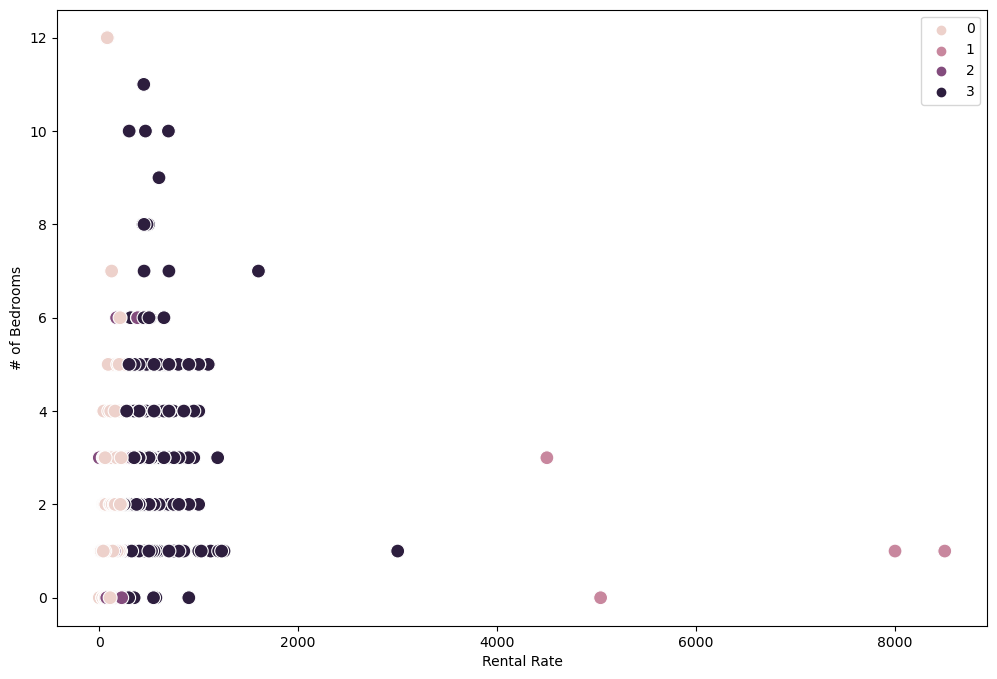

In [20]:
#Plot the clusters for the "Rental Rate" and "Bedrooms" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Rental Rate'], y=df_2['# of Bedrooms'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Rental Rate') 
plt.ylabel('# of Bedrooms') 
plt.show()

This scatterplot shows us that a majority of the data points are all congregated below 6 bedrooms and $2000 rental rate. You can however see that the light pink values are the cheaper rental rates.

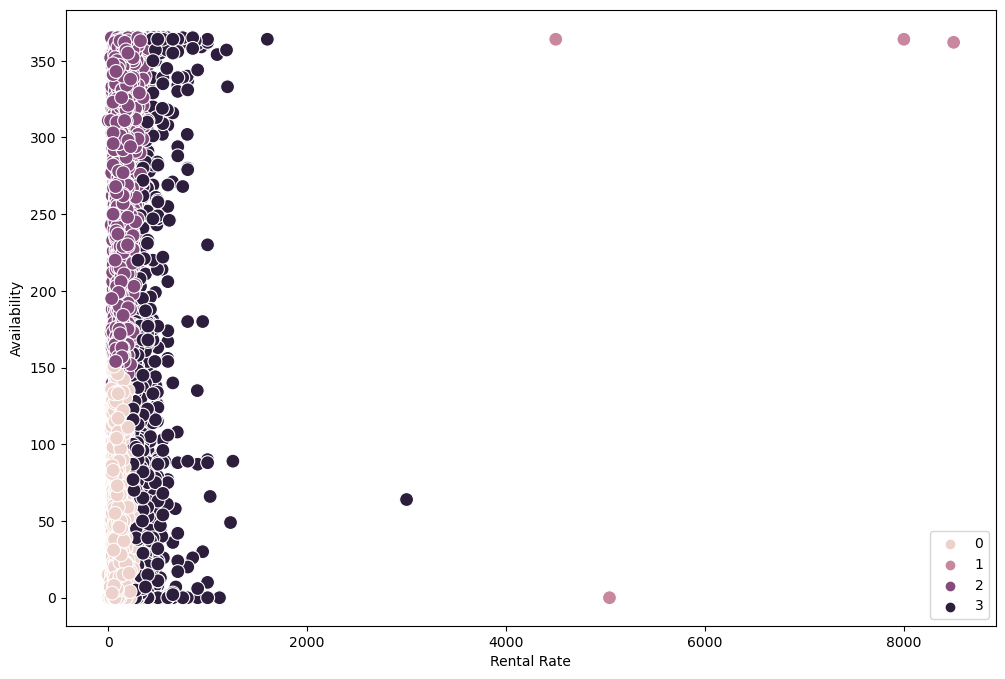

In [21]:
#Plot the clusters for the "Rental Rate" and "Availability" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Rental Rate'], y=df_2['Availability'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('Rental Rate') 
plt.ylabel('Availability') 
plt.show()

In this scatterplot we can see that again there are large almost indistinguishable clusters. There is a distinction between the clusters though with dark purple having a higher rental rate and varied availability. Light pink is majority least available and dark purple is majority most available. 

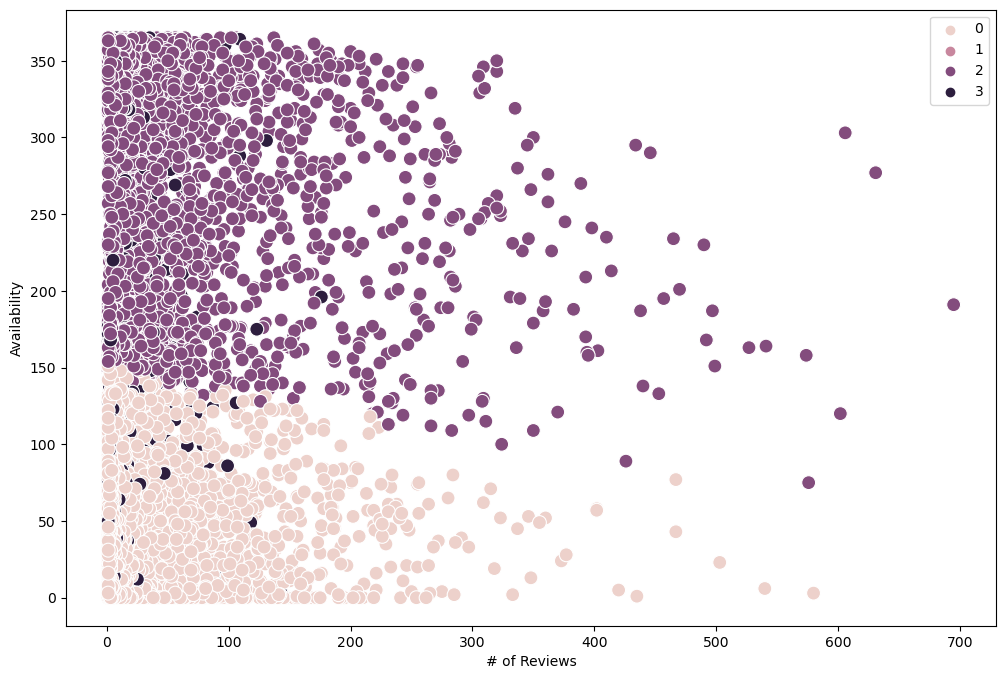

In [22]:
#Plot the clusters for the "# of Reviews" and "Availability" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['# of Reviews'], y=df_2['Availability'], hue=kmeans.labels_, s=100) 
ax.grid(False)
plt.xlabel('# of Reviews') 
plt.ylabel('Availability') 
plt.show()

This scatterplot you can distinctly see the light pink and light purple clusters. Hidden underneath and seemingly spread out are the other clusters. What I can glean from this is that # of reviews didn't seem to have that much of an impact on availability. We should search other relationships.

In [23]:
df_2.loc[df_2['clusters'] == 3, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'dark pink'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'pink'

In [24]:
df_2.groupby('cluster').agg({'Availability':['mean', 'median'], 
                         'Rental Rate':['mean', 'median'], 
                         '# of Reviews':['mean', 'median'],
                        'Review Scores':['mean', 'median'],
                          '# of Bedrooms':['mean', 'median']})

Availability         Rental Rate         # of Reviews         \
                    mean median         mean  median         mean median   
cluster                                                                    
dark pink     272.500000  363.0  6510.000000  6520.0     6.500000    5.5   
dark purple    79.303430   40.0   382.145998   325.0    17.346526   11.0   
pink           15.432074    0.0   127.282444   120.0    18.649333    9.0   
purple        267.472548  280.0   146.304173   135.0    58.116398   28.0   

            Review Scores        # of Bedrooms         
                     mean median          mean median  
cluster                                                
dark pink       90.750000   95.5      1.250000    1.0  
dark purple     95.762533   98.0      2.620932    2.0  
pink            94.828222   97.0      1.362444    1.0  
purple          94.582357   96.0      1.289898    1.0

Looking at these descriptive statistics we can see that the average availability is the lowest with the pink cluster; all of the other variables that were analyzed don't seem to vary too much from each other except for the dark pink cluster (comprised of 4 outlier data points). This is useful because it tells us to determine a corelation as to why some rental properties are booked more often we need to look at other variables.